# Figures for Full Report

In [1]:
%load_ext autoreload
%autoreload 2


In [48]:
import pandas as pd
import sys
import os
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={"figure.figsize": (20, 18), "lines.linewidth": 5})
sns.set_style("darkgrid")

In [10]:
sys.path.insert(0, "/Users/alexanderweinstein/Documents/Harris/Summer2020/Carceral_Budgeting/Exploratory/"
                   "visualize/Total_Costs/Total_Costs_by_Type")
sys.path.insert(0, "/Users/alexanderweinstein/Documents/Harris/Summer2020/Carceral_Budgeting/Dashboard/"
                   "carceral_budgeting_app/Apps")
sys.path.insert(0, "Users/alexanderweinstein/Documents/Harris/Summer2020/Carceral_Budgeting/Exploratory/"
                   "Full_Project_Reportback")


from Total_Costs_by_Type_2Ver import by_type
import app_helpers
from Full_Project_Reportback_1Ver import plot_over_time

In [3]:
yr = list(range(2016,2020))

In [4]:
overall, by_agency = by_type()

In [5]:
by_agency = app_helpers.prep_by_agency(by_agency)

In [6]:
spending_by_agency = by_agency.groupby("Nice Name").sum()[yr].reset_index()

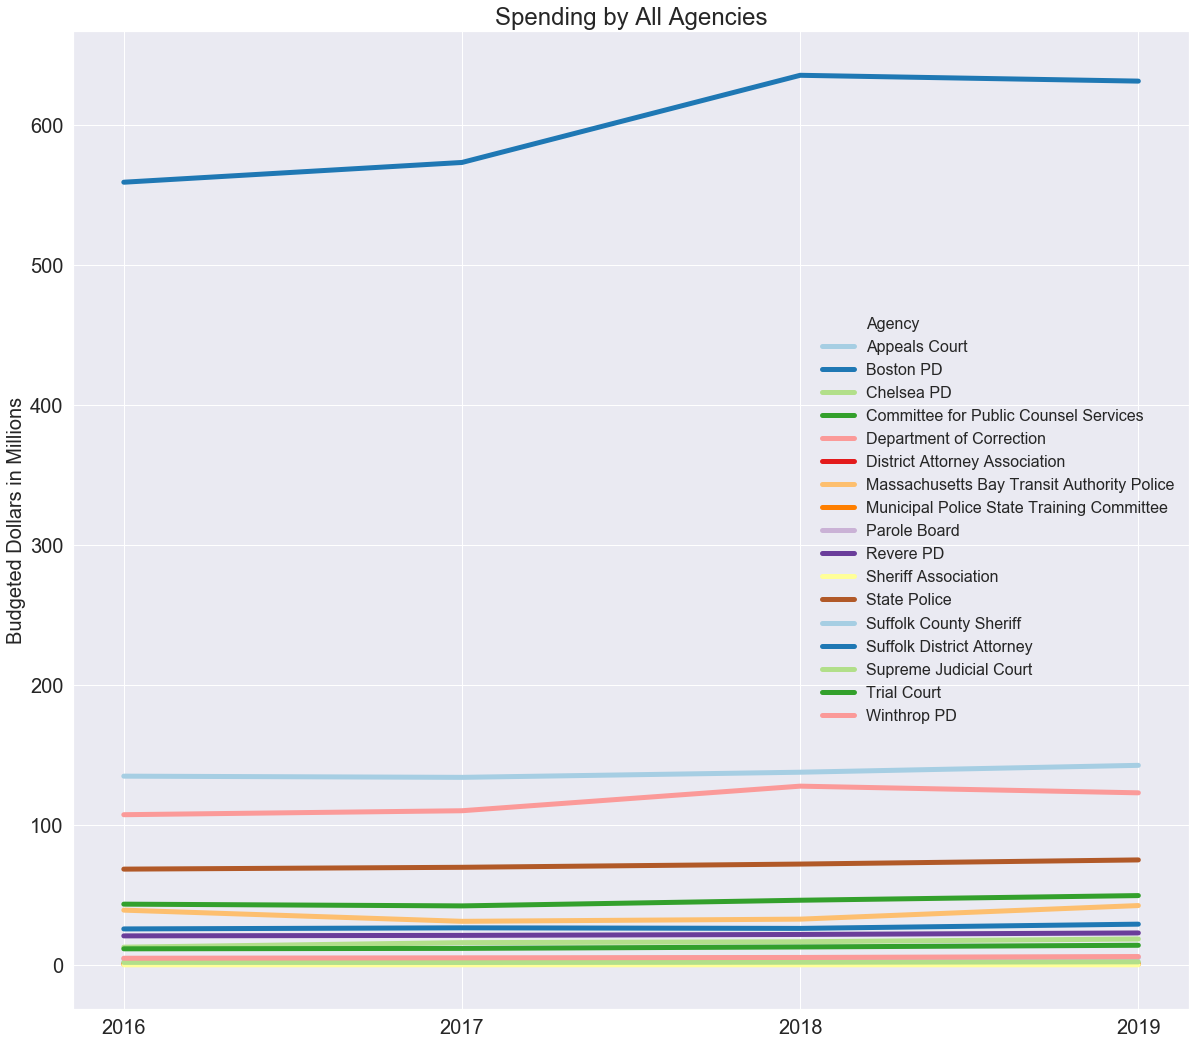

In [25]:
spending_all = plot_over_time(spending_by_agency, "Spending by All Agencies", hue_tup=("Nice Name", "Agency"))

In [28]:
spending_all.savefig('Figures/spending_all_Sep10_1Draft.png')

In [42]:
pd.DataFrame(spending_by_agency[yr].sum()).round().astype(int).T.to_csv("Tables/Spending_By_Year.csv")

In [53]:
total_by_cost_type = overall.sum(axis=1)
total_by_cost_type

Payroll Costs                 2765148275.403
Non-Payroll Operating Costs    398699346.725
Pension Costs                  545556492.666
Fringe Benefit Costs           624128000.662
Capital Costs                   60196633.254
dtype: float64

In [64]:
total_by_cost_type.index.nunique()

5

[(0.984313725490196, 0.6039215686274509, 0.6),
 (0.2, 0.6274509803921569, 0.17254901960784313),
 (0.6980392156862745, 0.8745098039215686, 0.5411764705882353),
 (0.12156862745098039, 0.47058823529411764, 0.7058823529411765),
 (0.6509803921568628, 0.807843137254902, 0.8901960784313725)]

In [71]:
pie_palette = [x for x in sns.color_palette("Paired", total_by_cost_type.index.nunique())[::-1]]

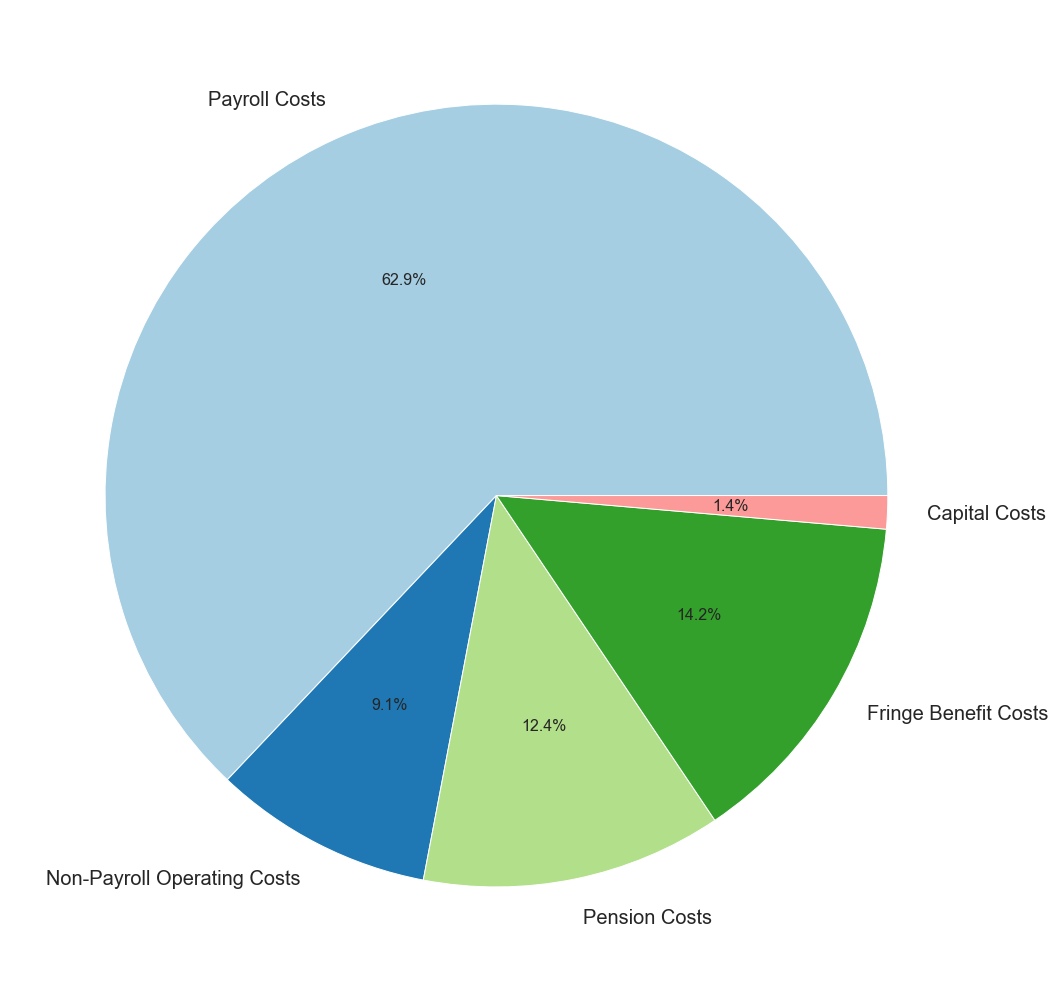

In [110]:
fig, ax = plt.subplots()
plt.rcParams['font.size']=16
patches, texts, autotexts = ax.pie(total_by_cost_type, labels=total_by_cost_type.index, 
       colors = sns.color_palette("Paired", total_by_cost_type.index.nunique()), autopct='%1.1f%%')
[x.set_fontsize(20) for x in texts]
plt.show()

In [111]:
fig.savefig("Figures/Cost_Type_Pie.png")

In [86]:
from Full_Project_Reportback_1Ver import SCDAO_cases 

In [94]:
SCDAO_cases_series  = pd.Series(SCDAO_cases).loc[yr]

In [97]:
cost_per_case = overall.sum() /SCDAO_cases_series


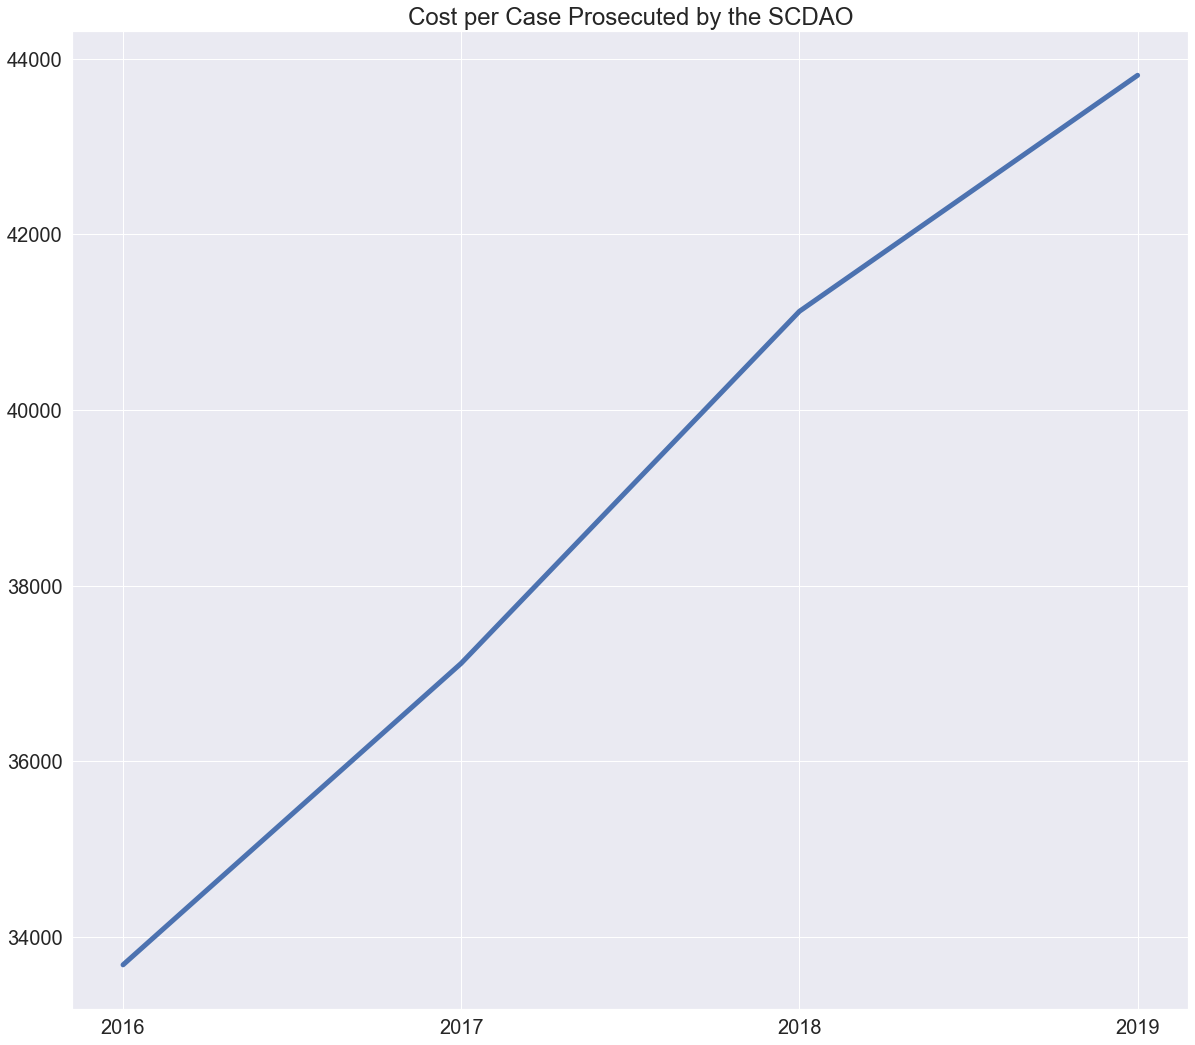

In [105]:
fig, ax = plt.subplots()
p = sns.lineplot(x = cost_per_case.index, y = cost_per_case.values)
p.set_title("Cost per Case Prosecuted by the SCDAO", fontsize=24)
plt.xticks(list(range(2016, 2020)))
p.tick_params(labelsize=20)

plt.show()

In [106]:
fig.savefig("Figures/Cost_Per_Case_Sep10_1Draft.png")

In [115]:
pd.DataFrame(cost_per_case.round().astype(int)).T.to_csv("Tables/Spending_Per_Case.csv")